In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("mymoviedb.csv", lineterminator = '\n')

In [3]:
df.head()

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
0,2021-12-15,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,2022-03-01,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...
2,2022-02-25,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...
3,2021-11-24,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...
4,2021-12-22,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793,7.0,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...


In [4]:
df.columns

Index(['Release_Date', 'Title', 'Overview', 'Popularity', 'Vote_Count',
       'Vote_Average', 'Original_Language', 'Genre', 'Poster_Url'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9827 entries, 0 to 9826
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Release_Date       9827 non-null   object 
 1   Title              9827 non-null   object 
 2   Overview           9827 non-null   object 
 3   Popularity         9827 non-null   float64
 4   Vote_Count         9827 non-null   int64  
 5   Vote_Average       9827 non-null   float64
 6   Original_Language  9827 non-null   object 
 7   Genre              9827 non-null   object 
 8   Poster_Url         9827 non-null   object 
dtypes: float64(2), int64(1), object(6)
memory usage: 691.1+ KB


In [6]:
df.describe()

,Popularity,Vote_Count,Vote_Average
count,9827.000000,9827.000000,9827.000000
mean,40.326088,1392.805536,6.439534
std,108.873998,2611.206907,1.129759
min,13.354000,0.000000,0.000000
25%,16.128500,146.000000,5.900000
50%,21.199000,444.000000,6.500000
75%,35.191500,1376.000000,7.100000
max,5083.954000,31077.000000,10.000000


# convert Release_date to DATETIME Format

In [7]:
df['Release_Date'] = pd.to_datetime(df['Release_Date'])
print(df['Release_Date'])

0      2021-12-15
1      2022-03-01
2      2022-02-25
3      2021-11-24
4      2021-12-22
          ...    
9822   1973-10-15
9823   2020-10-01
9824   2016-05-06
9825   2021-03-31
9826   1984-09-23
Name: Release_Date, Length: 9827, dtype: datetime64[ns]


In [8]:
df['Genre'].head()

0    Action, Adventure, Science Fiction
1              Crime, Mystery, Thriller
2                              Thriller
3    Animation, Comedy, Family, Fantasy
4      Action, Adventure, Thriller, War
Name: Genre, dtype: object

In [9]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
9822    False
9823    False
9824    False
9825    False
9826    False
Length: 9827, dtype: bool

In [10]:
df.duplicated().sum()

np.int64(0)

In [11]:
df.drop(['Overview','Original_Language','Poster_Url'] , axis = 1, inplace = True)

In [12]:
df

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021-12-15,Spider-Man: No Way Home,5083.954,8940,8.3,"Action, Adventure, Science Fiction"
1,2022-03-01,The Batman,3827.658,1151,8.1,"Crime, Mystery, Thriller"
2,2022-02-25,No Exit,2618.087,122,6.3,Thriller
3,2021-11-24,Encanto,2402.201,5076,7.7,"Animation, Comedy, Family, Fantasy"
4,2021-12-22,The King's Man,1895.511,1793,7.0,"Action, Adventure, Thriller, War"
...,...,...,...,...,...,...
9822,1973-10-15,Badlands,13.357,896,7.6,"Drama, Crime"
9823,2020-10-01,Violent Delights,13.356,8,3.5,Horror
9824,2016-05-06,The Offering,13.355,94,5.0,"Mystery, Thriller, Horror"
9825,2021-03-31,The United States vs. Billie Holiday,13.354,152,6.7,"Music, Drama, History"


Exploration Summary

we have a dataframe consisting of 9827 rows and 9 columns.

our dataset looks a bit tidy with no NaNs nor duplicated values.

Release_Date column needs to be casted into date time and to extract only the year value.

Overview, Original_Language and Poster-Url wouldn't be so useful during analysis, so we'll drop them.

there is noticable outliers in Popularity column

Vote_Average bettter be categorised for proper analysis.

Genre column has comma separated values and white spaces that need to be handled and casted into category.Exploration Summary

In [13]:
df['Year'] = df['Release_Date'].dt.year

In [14]:
df['Year'].dtype

dtype('int32')

Categorizing columns in Vote_Average

In [15]:
def categorize_col(df, col, labels):
    edges = [df[col].describe()['min'],
             df[col].describe()['25%'],
             df[col].describe()['50%'],
             df[col].describe()['75%'],
             df[col].describe()['max']]
    
    df[col] = pd.cut(df[col], edges, labels = labels, duplicates = 'drop')
    return df

In [16]:
labels = ['Flop', 'Below_average', 'Average', 'Popular']

In [17]:
categorize_col(df, 'Vote_Average', labels)

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre,Year
0,2021-12-15,Spider-Man: No Way Home,5083.954,8940,Popular,"Action, Adventure, Science Fiction",2021
1,2022-03-01,The Batman,3827.658,1151,Popular,"Crime, Mystery, Thriller",2022
2,2022-02-25,No Exit,2618.087,122,Below_average,Thriller,2022
3,2021-11-24,Encanto,2402.201,5076,Popular,"Animation, Comedy, Family, Fantasy",2021
4,2021-12-22,The King's Man,1895.511,1793,Average,"Action, Adventure, Thriller, War",2021
...,...,...,...,...,...,...,...
9822,1973-10-15,Badlands,13.357,896,Popular,"Drama, Crime",1973
9823,2020-10-01,Violent Delights,13.356,8,Flop,Horror,2020
9824,2016-05-06,The Offering,13.355,94,Flop,"Mystery, Thriller, Horror",2016
9825,2021-03-31,The United States vs. Billie Holiday,13.354,152,Average,"Music, Drama, History",2021


In [19]:
df['Vote_Average'].unique()

['Popular', 'Below_average', 'Average', 'Flop', NaN]
Categories (4, object): ['Flop' < 'Below_average' < 'Average' < 'Popular']

In [20]:
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre,Year
0,2021-12-15,Spider-Man: No Way Home,5083.954,8940,Popular,"Action, Adventure, Science Fiction",2021
1,2022-03-01,The Batman,3827.658,1151,Popular,"Crime, Mystery, Thriller",2022
2,2022-02-25,No Exit,2618.087,122,Below_average,Thriller,2022
3,2021-11-24,Encanto,2402.201,5076,Popular,"Animation, Comedy, Family, Fantasy",2021
4,2021-12-22,The King's Man,1895.511,1793,Average,"Action, Adventure, Thriller, War",2021


In [21]:
df['Vote_Average'].value_counts()

Vote_Average
Flop             2467
Popular          2450
Average          2412
Below_average    2398
Name: count, dtype: int64

In [22]:
df.dropna(inplace = True)

In [23]:
df.isna().sum()

Release_Date    0
Title           0
Popularity      0
Vote_Count      0
Vote_Average    0
Genre           0
Year            0
dtype: int64

# split genres into a list and one genre in single row

In [24]:
df['Genre'] = df['Genre'].str.split(', ')
df = df.explode('Genre').reset_index(drop = True)

In [25]:
df['Genre'] = df['Genre'].astype('category')
df['Genre'].dtypes

CategoricalDtype(categories=['Action', 'Adventure', 'Animation', 'Comedy', 'Crime',
                  'Documentary', 'Drama', 'Family', 'Fantasy', 'History',
                  'Horror', 'Music', 'Mystery', 'Romance', 'Science Fiction',
                  'TV Movie', 'Thriller', 'War', 'Western'],
, ordered=False, categories_dtype=object)

In [26]:
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre,Year
0,2021-12-15,Spider-Man: No Way Home,5083.954,8940,Popular,Action,2021
1,2021-12-15,Spider-Man: No Way Home,5083.954,8940,Popular,Adventure,2021
2,2021-12-15,Spider-Man: No Way Home,5083.954,8940,Popular,Science Fiction,2021
3,2022-03-01,The Batman,3827.658,1151,Popular,Crime,2022
4,2022-03-01,The Batman,3827.658,1151,Popular,Mystery,2022


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25552 entries, 0 to 25551
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Release_Date  25552 non-null  datetime64[ns]
 1   Title         25552 non-null  object        
 2   Popularity    25552 non-null  float64       
 3   Vote_Count    25552 non-null  int64         
 4   Vote_Average  25552 non-null  category      
 5   Genre         25552 non-null  category      
 6   Year          25552 non-null  int32         
dtypes: category(2), datetime64[ns](1), float64(1), int32(1), int64(1), object(1)
memory usage: 949.2+ KB


In [28]:
df.nunique()

Release_Date    5846
Title           9415
Popularity      8088
Vote_Count      3265
Vote_Average       4
Genre             19
Year             100
dtype: int64

# Data Visualisation

In [29]:
 sns.set_style('whitegrid')

In [30]:
df['Genre'].describe()

count     25552
unique       19
top       Drama
freq       3715
Name: Genre, dtype: object

[]

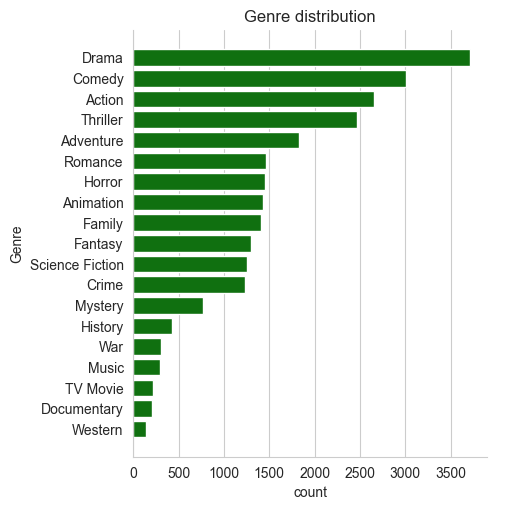

In [40]:
sns.catplot(y = 'Genre', data = df, kind = 'count', order=df['Genre'].value_counts().index,
         color = 'green')
plt.title("Genre distribution")
plt.plot()

[]

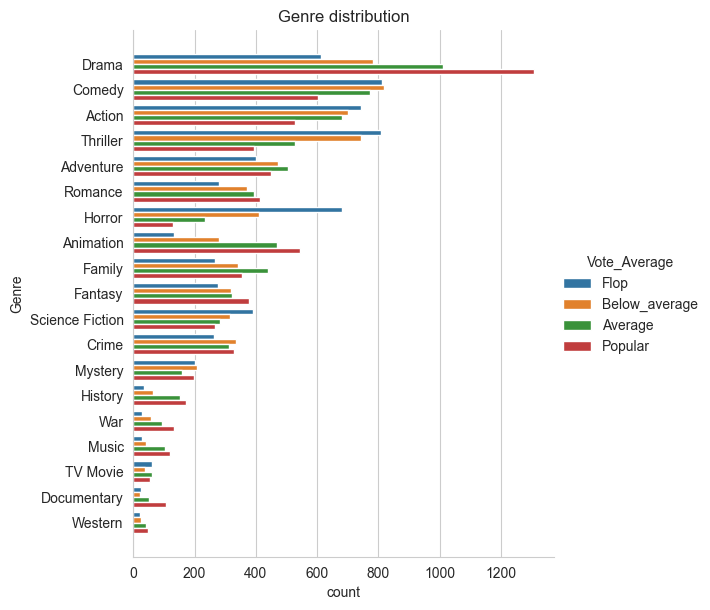

In [50]:
sns.catplot(y = 'Genre', data = df, kind = 'count', order=df['Genre'].value_counts().index,
         hue = "Vote_Average", height = 6)
plt.title("Genre distribution")
plt.plot()

# which has highest votes

Text(0.5, 1.0, 'Votes distribution')

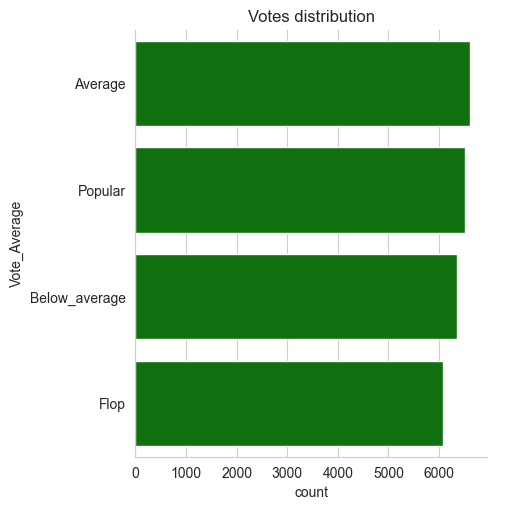

In [53]:
sns.catplot(y = 'Vote_Average', data = df, kind = 'count', order = df['Vote_Average'].value_counts().index,
            color = 'green')
plt.title("Votes distribution")

# Which movie got the highest popularity? what is it's genre

In [54]:
df[df['Popularity']==df['Popularity'].max()]

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre,Year
0,2021-12-15,Spider-Man: No Way Home,5083.954,8940,Popular,Action,2021
1,2021-12-15,Spider-Man: No Way Home,5083.954,8940,Popular,Adventure,2021
2,2021-12-15,Spider-Man: No Way Home,5083.954,8940,Popular,Science Fiction,2021



# Which movie got the lowest popularity? what is it's genre

In [55]:
df[df['Popularity']==df['Popularity'].min()]

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre,Year
25546,2021-03-31,The United States vs. Billie Holiday,13.354,152,Average,Music,2021
25547,2021-03-31,The United States vs. Billie Holiday,13.354,152,Average,Drama,2021
25548,2021-03-31,The United States vs. Billie Holiday,13.354,152,Average,History,2021
25549,1984-09-23,Threads,13.354,186,Popular,War,1984
25550,1984-09-23,Threads,13.354,186,Popular,Drama,1984
25551,1984-09-23,Threads,13.354,186,Popular,Science Fiction,1984


# Which year has the most filmmed movies?

Text(0.5, 1.0, 'Release Date distribution')

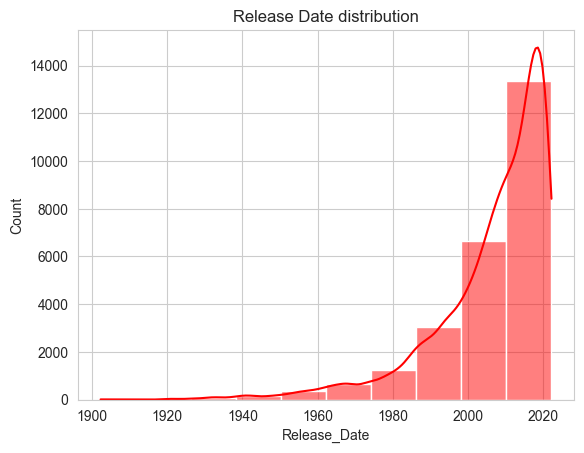

In [74]:
# df['Release_Date'].hist()
sns.histplot(data=df, x="Release_Date", bins = 10, kde = True,color = 'red')
plt.title("Release Date distribution")

In [59]:
df['Release_Date'].describe()

count                            25552
mean     2006-05-25 20:37:57.896055168
min                1902-04-17 00:00:00
25%                2000-07-15 00:00:00
50%                2010-11-25 00:00:00
75%                2017-07-20 06:00:00
max                2022-03-10 00:00:00
Name: Release_Date, dtype: object

Conclusion

Q1: What is the most frequent genre in the dataset?
Drama genre is the most frequent genre in our dataset and has appeared more than 14% of the times among 19 other genres.

Q2: What genres has highest votes?
we have 25.5% of our dataset with popular vote (6520 rows). Drama again gets the highest popularity among fans by being having more than 18.5% of movies popularities.

Q3: What movie got the highest popularity? what's its genre?
Spider-Man: No Way Home has the highest popularity rate in our dataset and it has genres of Action, Adventure and Sience Fiction.

Q3: What movie got the lowest popularity? what's its genre?
The united states, thread’ has the highest lowest rate in our dataset and it has genres of music, drama, ‘war’, ‘sci-fi’ and history’.

Q4: Which year has the most filmed movies?
year 2020 has the highest filming rate in our dataset.

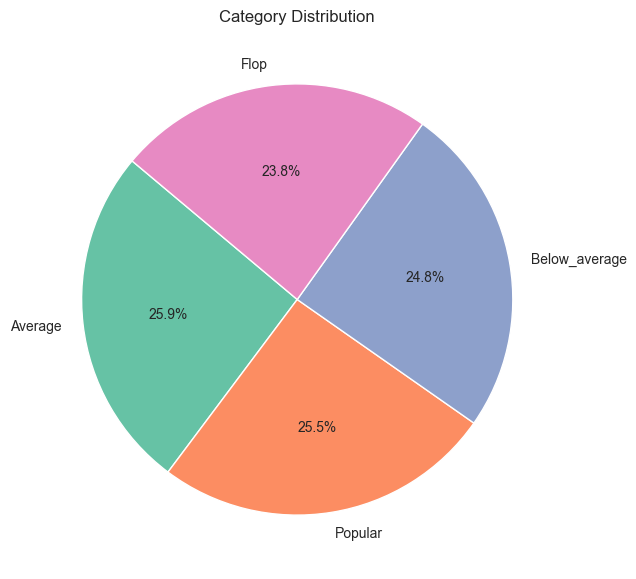

In [76]:
colors = sns.color_palette("Set2")

df['Vote_Average'].value_counts().plot.pie(
    autopct='%1.1f%%',         # Show percentages
    startangle=140,            # Rotate starting angle
    colors=colors,             # Apply Seaborn colors
    figsize=(7, 7),            # Chart size
    ylabel='',                 # Hide y-axis label
    title='Category Distribution'  # Chart title
)
plt.show()